# Assignment8

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [8]:
df = pd.read_csv("car_data.csv")

In [9]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [10]:
df['Type'].value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

In [11]:
df.shape

(804, 12)

In [12]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [14]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [15]:
df['Model'].value_counts()

Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64

In [16]:
df['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [17]:
df['Trim'].value_counts()

Sedan 4D               170
Coupe 2D                50
LS Sedan 4D             50
LT Sedan 4D             30
LS Coupe 2D             30
Quad Coupe 2D           20
SE Sedan 4D             20
Arc Sedan 4D            20
GT Sedan 4D             20
Aero Sedan 4D           20
Linear Wagon 4D         14
SLE Sedan 4D            10
GT Coupe 2D             10
GTP Sedan 4D            10
AWD Sportwagon 4D       10
Linear Conv 2D          10
GT Sportwagon           10
Sportwagon 4D           10
SS Coupe 2D             10
Linear Sedan 4D         10
Aero Conv 2D            10
Arc Conv 2D             10
Arc Wagon 4D            10
Aero Wagon 4D           10
GXP Sedan 4D            10
LT MAXX Hback 4D        10
LT Coupe 2D             10
LS Hatchback 4D         10
CXL Sedan 4D            10
CXS Sedan 4D            10
Custom Sedan 4D         10
Limited Sedan 4D        10
Special Ed Ultra 4D     10
DHS Sedan 4D            10
DTS Sedan 4D            10
Hardtop Conv 2D         10
LT Hatchback 4D         10
M

In [18]:
#df=df.drop_duplicates

###EDA

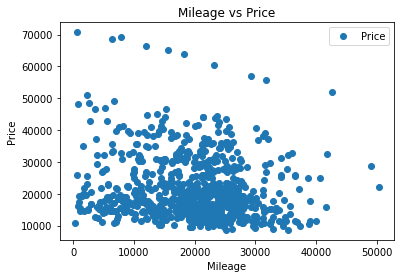

In [19]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [20]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


###As the value of correlation is -0.14 There is no correlation between Mileage and Price, so we have to transform the features.

In [21]:
x = df[['Mileage']].values 
y = df['Price'].values 

###Linear regression equation for mileage vs price.

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [23]:
print('intercept:',regressor.intercept_) # c 

intercept: 24764.559006061685


In [24]:
print('coefficients:', regressor.coef_) #m

coefficients: [-0.1725205]


###Equation on the chart.

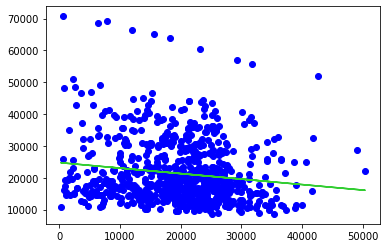

In [26]:
plt.scatter(x, y, color='blue')
plt.plot(x, regressor.predict(x), color='limegreen')

In [25]:
a=float(input())
print("y=",regressor.coef_*a+regressor.intercept_)

4
y= [24763.86892405]


###Evaluation Matric R2

In [27]:
from sklearn import metrics
print('R2- SCORE:',regressor.score(x,y))

R2- SCORE: 0.02046344732348926


###Value of R2 is 0.02

##Task 2

In [28]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


###EDA

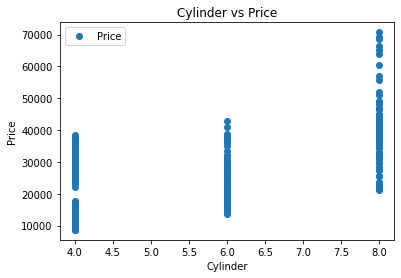

In [30]:
df.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

In [31]:
df[['Cylinder','Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


###There is good correlation between Cylinder and Price.

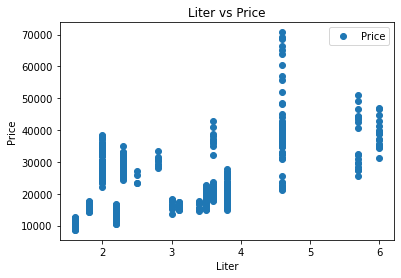

In [32]:
#sb.regplot(x = "Liter",y = "Price", ci = None,data = df)
df.plot(x='Liter', y='Price', style='o')
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

In [33]:
df[['Liter','Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


###There is good correlation between Liter and Price.

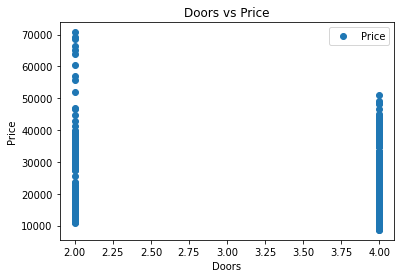

In [34]:
#sb.regplot(x = "Doors",y = "Price", ci = None,data = df)
df.plot(x='Doors', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

In [35]:
df[['Doors','Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


###There is no correlation between Doors and Price.

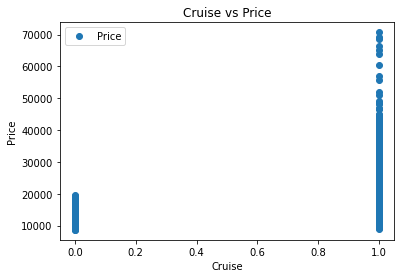

In [36]:
#sb.regplot(x = "Cruise",y = "Price", ci = None,data = df)
df.plot(x='Cruise', y='Price', style='o')
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

In [37]:
df[['Cruise','Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


There is correlation between Cruise and Price.

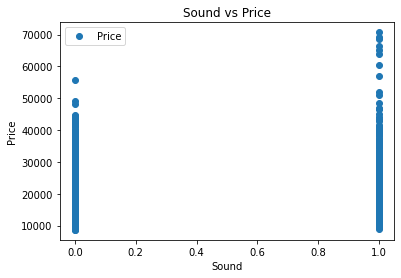

In [38]:
#sb.regplot(x = "Sound",y = "Price", ci = None,data = df)
df.plot(x='Sound', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

In [39]:
df[['Sound','Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


###There is no correlation between Sound and Price.

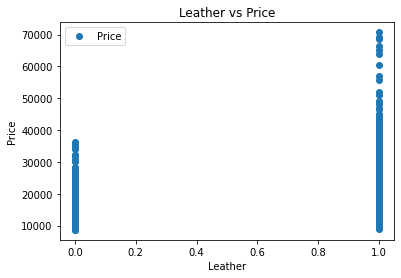

In [40]:
#sb.regplot(x = "Leather",y = "Price", ci = None,data = df)
df.plot(x='Leather', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

In [41]:
df[['Leather','Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


###There is no correlation between Leather and Price.

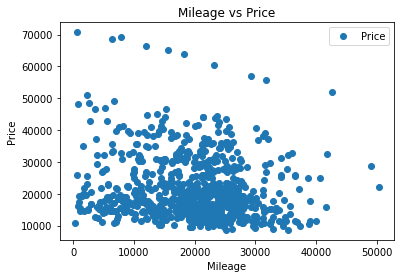

In [42]:
#sb.regplot(x = "Mileage",y = "Price", ci = None,data = df)
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [43]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


###There is no correlation between Mileage and Price.

In [44]:
X = df[['Cylinder', 'Liter', 'Cruise','Leather']].values 
y = df['Price'].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

###Model Training

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
coeff_df = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Cruise','Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Cylinder,4714.708361
Liter,153.005194
Cruise,2668.955674
Leather,1468.458415


In [61]:
print('intercept:',regressor.intercept_) #c

intercept: 21286.771470559215


In [62]:
print('coefficient:',regressor.coef_) # m

coefficient: [4714.70836116  153.00519363 2668.95567352 1468.45841476]


###Linear Regression Equation.

In [63]:
w=float(input())
print("y=",(regressor.coef_*w)+regressor.intercept_)

2
y= [30716.18819287 21592.78185782 26624.68281759 24223.68830008]


In [65]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,14862.093870,26217.728373
1,16256.236168,23049.339610
2,15802.652861,9819.811190
3,45061.951935,33178.645584
4,12425.389171,13140.362167
...,...,...
156,18548.978593,23007.840824
157,36332.894685,33178.645584
158,21683.031464,23049.339610
159,18040.144006,26314.558873


###Evaluation matric R2

In [66]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.28469766307471756


####Here the Value of R2 is 0.28

###Find the combination of the factors that is the best predictor for price.

In [52]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Mileage', 'Price','Cylinder','Liter','Doors','Cruise','Sound','Leather'],selector.support_))

[('Mileage', True), ('Price', False), ('Cylinder', True), ('Liter', True)]

###Sequential Feature selection

In [53]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Mileage', 'Price','Cylinder','Liter','Doors','Cruise','Sound','Leather'],sfs.get_support())))

[('Mileage', True), ('Price', False), ('Cylinder', True), ('Liter', False)]


In [ ]:
X_trans = sfs.transform(X)
X_trans # feature selection

array([[6., 1.],
       [6., 1.],
       [6., 1.],
       ...,
       [6., 1.],
       [6., 1.],
       [6., 1.]])

##Tasks, Hard Mode

In [54]:
df.head(n=3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [56]:
df.shape

(804, 12)

###Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [55]:
data = pd.get_dummies(df, columns = ['Make','Model','Type']) 
data.head(n=3)

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [57]:
data.shape

(804, 52)

##Find the best combination of factors to predict price.

In [58]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Mileage', 'Price','Make','Model','Trim','Type','Cylinder','Liter','Doors','Cruise','Sound','Leather'],selector.support_))

[('Mileage', True), ('Price', False), ('Make', True), ('Model', True)]

###Sequential Feature Selection

In [59]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Mileage', 'Price','Make','Model','Trim','Type','Cylinder','Liter','Doors','Cruise','Sound','Leather'],sfs.get_support())))

[('Mileage', True), ('Price', False), ('Make', True), ('Model', False)]


In [60]:
X_trans = sfs.transform(X)
X_trans # feature selection

array([[6., 1.],
       [6., 1.],
       [6., 1.],
       ...,
       [6., 1.],
       [6., 1.],
       [6., 1.]])